In [51]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import math
from datetime import datetime
import statsmodels.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

In [52]:
def clean_up_columns(data):
    df=pd.DataFrame()
    for old_name in data.columns:
        new_name = old_name.split('TRc1')[0][:-1]
        df[new_name]=data[old_name]
    return df
data=pd.read_csv('Price.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='last')
price = clean_up_columns(data)
data=pd.read_csv('Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='mean')
vol = clean_up_columns(data)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


In [55]:
months=pd.DataFrame()
months['test']=price['MEXDER-10YR BOND']
months= months.drop('test',axis=1)
tstats=pd.DataFrame()
tstats['test']=price['MEXDER-10YR BOND']
tstats= tstats.drop('test',axis=1)
for i in range(1,17):
    for mkt in price.columns:
        Y=price[mkt].resample(rule='m',how='last').pct_change().dropna()
        Y=(Y/pd.rolling_std(Y,12)).dropna()[:'2016']
        X = pd.DataFrame()
        X['month']=Y.shift(i).dropna()
        m=pd.stats.ols.MovingOLS(y=Y,x=X,window_type='rolling',
                           window=36,min_periods=12)
        tstats[mkt]=m.t_stat.month
    months['t-'+str(i)]=tstats.mean(axis=1)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


ValueError: operands could not be broadcast together with shapes (0,2) (0,) 

In [ ]:
months.plot(colormap='jet')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=24,center=False).mean()
  if __name__ == '__main__':


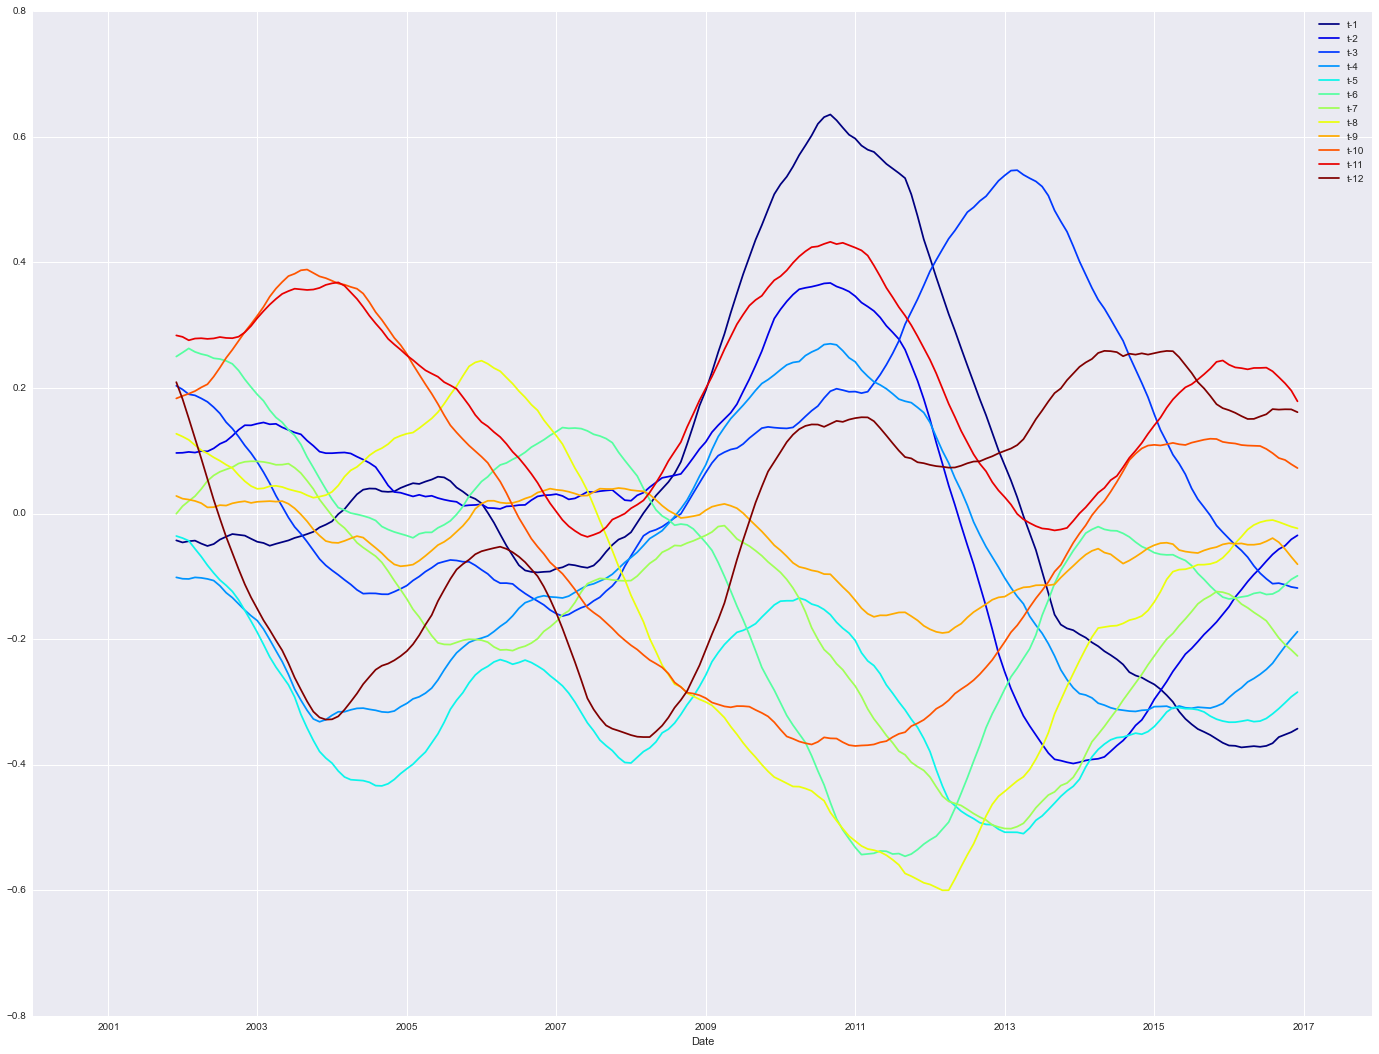

In [61]:
pd.rolling_mean(months['2000':],24).plot(colormap='jet')
